## Regression

Model purpose: given a job description, predict a score for the job description.

### Download and loading of dataset

In [2]:
import kagglehub
import os
import pandas as pd
# Download latest version to the specified directory
# path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

path = "/home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13"

print(f"Path to dataset files: {path}")
print(f"List of files in the dataset: {os.listdir(path)}")

/home/leon/.cache/pypoetry/virtualenvs/nlp-linkedin-offers-Dd-EBZf7-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
List of files in the dataset: ['companies', 'postings.csv', 'jobs', 'mappings']


**Drop indexes with NaN values**

In [45]:
postings_path = path + "/postings.csv"
postings_df = pd.read_csv(postings_path)

### Data preprocessing

In [39]:
# Quick overview of the dataset
print(f"Number of rows: {postings_df.shape[0]}")
print(f"Number of columns: {postings_df.shape[1]}")

useful_cols = ["description", "views"]

# display basic statistics on useful columns
for col in useful_cols:
    print(f"Statistics for {col}:")
    print(postings_df[col].describe())
    print()

# drop rows with NaN values in specific columns
print(f"Number of rows before dropping NaN values: {postings_df.shape[0]}")
postings_df.dropna(subset=useful_cols, inplace=True)
print(f"Number of rows after dropping NaN values: {postings_df.shape[0]}")



Number of rows: 122153
Number of columns: 8
Statistics for description:
count                                                122153
unique                                               106499
top       Position Summary: Our Sales Manager has managi...
freq                                                    447
Name: description, dtype: object

Statistics for views:
count     122153.0
mean     14.618364
std      85.906019
min            1.0
25%            3.0
50%            4.0
75%            8.0
max         9975.0
Name: views, dtype: Float64

Statistics for max_salary:
count    2.935100e+04
mean     9.204118e+04
std      7.063008e+05
min      1.000000e+00
25%      4.800000e+01
50%      8.000000e+04
75%      1.400000e+05
max      1.200000e+08
Name: max_salary, dtype: float64

Number of rows before dropping NaN values: 122153
Number of rows after dropping NaN values: 29351


Nb of single posting normalized salary: [ 38480.  83200.  55000. ... 159200. 210850. 177375.]
Unique normalized salaries: 7259
Nb rows: 36073


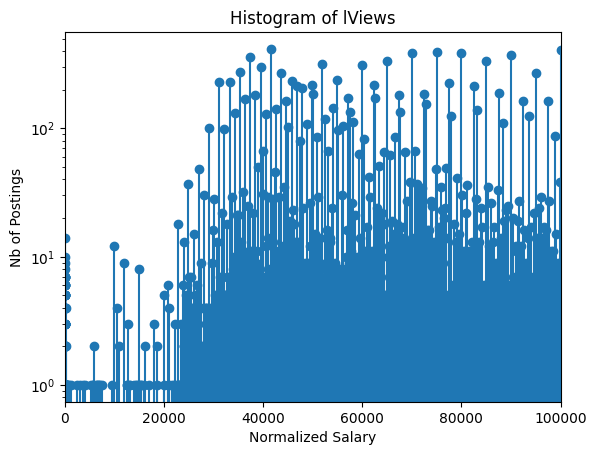

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
9237,3886471794,Eastridge Workforce Solutions,Intellectual Property Associate (246215),Eastridge Workforce Solutions has partnered wi...,275000.0,HOURLY,"Dallas, TX",9814.0,4.0,NaN,...,NaN,1.712637e+12,www.datafrenzy.com,0,FULL_TIME,USD,BASE_SALARY,535600000.0,75201.0,48113.0


In [117]:
import matplotlib.pyplot as plt
import numpy as np

# print(postings_df['pat_period'].value_counts())
# print(f"Nb of YEARLY salary: {len(postings_df['pay_period'] == 'YEARLY')}")
# print(f"Nb of HOURLY salary: {len(postings_df['pay_period'] == 'HOURLY')}")


max_sal_df = postings_df.copy()
max_sal_df.dropna(subset=["normalized_salary"], inplace=True)
print(f"Nb of single posting normalized salary: {max_sal_df['normalized_salary'].unique()}")


unique, counts = np.unique(max_sal_df["normalized_salary"], return_counts=True)
print(f"Unique normalized salaries: {len(unique)}")
print(f"Nb rows: {len(max_sal_df)}")
# Show job posting with max salary


plt.stem(unique, counts)
plt.xlim(0, 1000000)
plt.xlabel("Normalized Salary")
plt.yscale("log")
plt.ylabel("Nb of Postings")
plt.title("Histogram of lViews")
plt.show()


postings_df.sort_values(by='normalized_salary', ascending=False).head(1)


### Data analysis

Number of rows: 123849
Number of columns: 31
count    122160.000000
mean         14.618247
std          85.903598
min           1.000000
25%           3.000000
50%           4.000000
75%           8.000000
max        9975.000000
Name: views, dtype: float64
Number of unique values in the 'views' column: 684
Total rows for views col: 123849
Number of rows with 1 views: 4587
Number of rows with 2 views: 14417
Number of rows with 100 views: 29


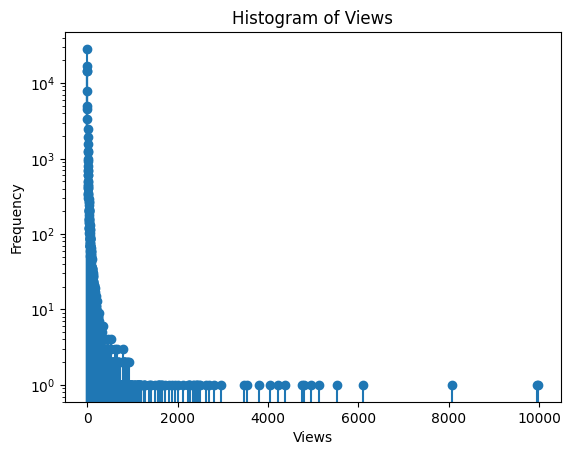

In [95]:


# Quick overview of the dataset
print(f"Number of rows: {postings_df.shape[0]}")
print(f"Number of columns: {postings_df.shape[1]}")

# display basic statistics on useful columns
# for col in useful_cols:
#     print(f"{col}: {postings_df[col].dtype}")
#     print(f"Statistics for {col}:")
#     print(postings_df[col].describe())
#     print()

# postings_df["views"] = postings_df["views"].astype("Int64", errors="raise")

# Display the first few rows of the DataFrame
# print(postings_df.head())
# print(postings_df["description"][0])

print(postings_df["views"].describe())
print(f"Number of unique values in the 'views' column: {postings_df["views"].nunique()}")
print("Total rows for views col:", len(postings_df["views"]))
print("Number of rows with 1 views:", len(postings_df[postings_df["views"] == 1]))
print("Number of rows with 2 views:", len(postings_df[postings_df["views"] == 2]))
print("Number of rows with 100 views:", len(postings_df[postings_df["views"] == 100]))

unique, counts = np.unique(postings_df["views"], return_counts=True)

# Histogram of the views column log, limit x-axis to 1000
# plt.hist(postings_df["views"], bins=2, log=False)
# plt.xlim(0, 10)

plt.stem(unique, counts)
plt.xlim(0, 10000)
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.yscale("log")
plt.title("Histogram of Views")
plt.show()



**Cleaning the descriptions of unwanted characters such as emojis etc**

In [22]:
import re

# Nettoyage de base
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d{10,}', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the clean_text function and ASSIGN the result back
postings_df['description'] = postings_df['description'].apply(lambda x: clean_text(x))
postings_df

,job_id,company_name,title,description,max_salary,location,company_id,views
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,job descriptiona leading real estate firm in n...,20.0,"Princeton, NJ",2774458.0,20.0
1,1829192,NaN,Mental Health Therapist/Counselor,"at aspen therapy and wellness , we are committ...",50.0,"Fort Collins, CO",NaN,1.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,65000.0,"Cincinnati, OH",64896719.0,8.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,175000.0,"New Hyde Park, NY",766262.0,16.0
4,35982263,NaN,Service Technician,looking for hvac service tech with experience ...,80000.0,"Burlington, IA",NaN,3.0
...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,our walnut creek office is currently seeking a...,195000.0,"Walnut Creek, CA",56120.0,1.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",about pinterest millions of people across the ...,NaN,United States,1124131.0,3.0
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",company overview eps learning is a leading k12...,NaN,"Spokane, WA",90552133.0,3.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,the business development manager is a hunter t...,NaN,"Texas, United States",2793699.0,4.0
